This file is based on https://github.com/kunsen-an/vaex-examples/blob/master/medium-nyc-taxi-data-eda/vaex-taxi-article.ipynb

This file was modified and executed on Google Colaboratory (CPU instance) on Mar. 24, 2020.

# Exploratory data analysis: N. Y. CityCabs data: 2015

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
!pip install vaex-core vaex-viz vaex-hdf5 vaex-jupyter PyQt5 vaex-ui 

     |████████████████████████████████| 2.2MB 2.8MB/s 
     |████████████████████████████████| 63.5MB 58kB/s 
     |████████████████████████████████| 296kB 43.6MB/s 
     |████████████████████████████████| 2.9MB 44.7MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 4.7MB 56.3MB/s 
     |████████████████████████████████| 2.9MB 57.2MB/s 
     |████████████████████████████████| 2.8MB 44.7MB/s 
     |████████████████████████████████| 460kB 53.3MB/s 
     |████████████████████████████████| 3.1MB 51.0MB/s 
     |████████████████████████████████| 256kB 55.8MB/s 
     |████████████████████████████████| 4.5MB 48.6MB/s 
     |████████████████████████████████| 1.1MB 53.6MB/s 
     |████████████████████████████████| 122kB 67.7MB/s 
     |████████████████████████████████| 665kB 53.0MB/s 
     |████████████████████████████████| 256kB 51.1MB/s 
  Created wheel for vaex-viz: filename=vaex_viz-0.3.8-cp36-none-any.whl size=17350 sha256=b55ec2e43895df9abf

In [0]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Adjusting `matplotlib` parameters

In [0]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Obtaining the data

The original data is courtesy of the New York City Taxi and Limousine Commision, and can be downloaded from [this website](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). 

The data was then converted to the memory-mappable HDF5 file format. For an example on how to do this, you may want to look at [this notebook](https://nbviewer.jupyter.org/github/vaexio/vaex-examples/blob/master/medium-airline-data-eda/airline-original-data-conversion.ipynb).

### Read in the data

- Can "read" the memmory mapped file that we have on disk in no time.
- `Vaex` can also read data stored on S3. The data is streamed on need-to-have basis and is locally cached.

In [0]:
# # Read in the data from S3
# df = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')

In [0]:
# Read in the data from Google Drive
df = vaex.open('/content/gdrive/My Drive/Colab Notebooks/vaex/taxi/yellow_taxi_2015_f32s.hdf5')

In [5]:
# A view into the data
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.090000033378601,-73.98672485351562,40.75642013549805,1.0,nan,-73.9964599609375,40.74289321899414,5.0,0.5,0.5,0.0,0.0,6.0
1,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28000020980835,-74.00418853759766,40.72119140625,1.0,nan,-73.97000122070312,nan,nan,nan,nan,nan,nan,nan
2,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.590000033378601,-73.993896484375,40.7501106262207,1.0,0.0,-73.97478485107422,40.75061798095703,12.0,1.0,0.5,3.25,0.0,17.049999237060547
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.299999952316284,-74.00164794921875,40.7242431640625,1.0,0.0,-73.99441528320312,40.75910949707031,14.5,0.5,0.5,2.0,0.0,17.799999237060547
4,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.7999999523162842,-73.96334075927734,40.80278778076172,1.0,0.0,-73.95182037353516,40.82441329956055,9.5,0.5,0.5,0.0,0.0,10.800000190734863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,986",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"146,112,987",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"146,112,988",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"146,112,989",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


### Quick insights into this dataset

This is done with a single pass over the data

In [6]:
# Get a high level overview of the DataFrame
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
dtype,str,datetime64[ns],datetime64[ns],int64,str,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,146112991,146112991,146112991,146112991,146112991,146112991,146112991,146112991,146112991,146112989,146112991,146112990,146112990,146112990,146112990,146112990,146112990,146112990
NA,0,0,0,0,0,0,0,0,0,2,0,1,1,1,1,1,1,1
mean,--,1970-01-01T00:01:25.835533096,1970-01-01T00:00:05.863547737,1.6806633573054433,--,13.137274561756632,-72.80689147618536,40.107714232654736,1.0420616124407445,0.008331969719680431,-72.85359844626949,40.134391913190385,12.938776600017544,0.314266095776757,0.4975636310707298,1.7284416808433372,0.3077738357453525,16.09624720499848
std,--,9.08535e+15,9.22274e+15,1.33337,--,19875.1,9.22026,5.07843,0.668078,0.0908986,9.03923,4.9794,124.599,0.531459,0.0500798,326.837,1.66441,356.994
min,--,2014-12-15T18:23:50.043213824,1899-12-31T23:59:43.370698752,0,--,-4.08401e+07,-874.003,-78.1947,1,0,-781.833,-78.1947,-496,-79,-3,-440,-99,-496.3
max,--,2016-01-01T00:00:49.632313344,2253-08-23T08:00:13.061652480,9,--,1.98623e+08,172.6,404.867,99,1,172.6,483.45,825999,999.99,91,3.95059e+06,1901.4,3.95061e+06


### Getting read of outliers and errouneous data

In this section we will use the output of describe to get rid of outliers, and other erroneous data.
Let's start with the City of New York itself. 

Let's visualise the pickup locations.

**次のコメント内のコードをColaboratoryで実行するとランタイムが切断される。
このためにコメントアウトしてある。**

In [7]:
# Interactively visualise the pickup locations of all taxi trips in our dataset.
'''
df.plot_widget(df.pickup_longitude, 
               df.pickup_latitude, 
               shape=512, 
               limits='minmax',
               f='log1p', 
               colormap='plasma')
'''

"\ndf.plot_widget(df.pickup_longitude, \n               df.pickup_latitude, \n               shape=512, \n               limits='minmax',\n               f='log1p', \n               colormap='plasma')\n"

With Vaex we can interactively explore such heamaps as the one above, even when the data contains over 1 billion samples. This way we can choose the spatial extent over which the taxi company operates in New York City. In fact, it is mostly Manhattan.

In [0]:
# Define the boundaries by interactively choosing the area of interest!
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df_filtered = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
                 (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
                 (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
                 (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

From the output of the `describe` method we see that the maximum number of passengers is 255! 
Let's make a bar plot showing the common number of passengers in a taxi trip.

[########################################] 100.00% elapsed time  :    49.32s =  0.8m =  0.0h
 

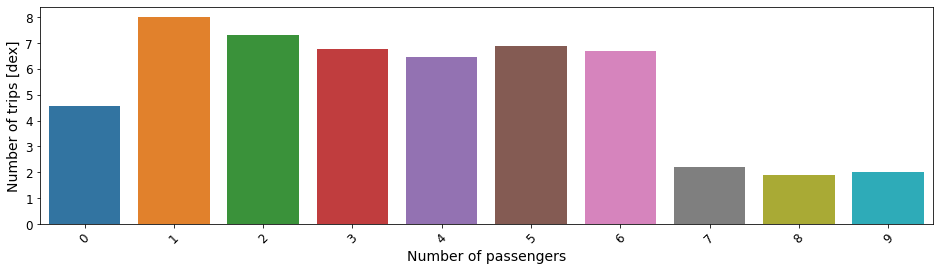

In [9]:
# Get number of unique trips with certain number of passengers
num_passengers = df_filtered.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()

First impressions: Typical number of passengers in a ride between 1-6. Very large number of taxi trips with 0 passengeres. Are these deliveries maybe, or were passengers not recorded. There are few hundreds of taxi trips with 7-9 passengers, and beyond that the numbers look erroneous. 

In this analysis we will focus only on the trips with typical number of passengers, that is between 1 and 6. So let's add that do the filter.

In [0]:
# Filterd based on the number of passengers
df_filtered = df_filtered[(df_filtered.passenger_count>0) & (df_filtered.passenger_count<7)]

Next up, we turn to the distance column. Here we see that the minimum value is negative, i.e. for sure something has gone wrong, and the maximum values is.. well very large! In fact, to put this in perspective:

In [11]:
# What is the largest distance?
max_trip_distance = df_filtered.trip_distance.max().astype('int')

print(f'The largest distance in the data is {max_trip_distance} miles!')

print(f'This is {max_trip_distance/238_900:.1f} times larger than the distance between the Earth and the Moon!')

The largest distance in the data is 198623008 miles!
This is 831.4 times larger than the distance between the Earth and the Moon!


Let's plot the distribution of distances, but in a more sensible range, relative to the scale of the part of New York City we selected above.

[#####################################---] 100.00% elapsed time  :     0.92s =  0.0m =  0.0h
 

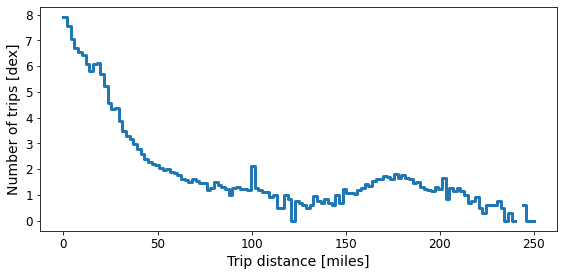

In [12]:
# Plot the distribution of distances.
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_distance', limits=[0, 250], f='log10', shape=128, lw=3, progress=True)
plt.xlabel('Trip distance [miles]')
plt.ylabel('Number of trips [dex]')
plt.show()

So we observe that at ~100 miles, the number of taxi trips drops considerably, and becomes more sporadic. Thus we decide to only consider taxi trip that in total are up to 100 miles.

In [0]:
# Select taxi trips have travelled maximum 100 miles (but also with non-zero distance).
df_filtered = df_filtered[(df_filtered.trip_distance > 0) & (df_filtered.trip_distance < 100)]

In the next step of our data cleaning process, let's look at the distributions of trip times and speeds, and make sure they are sensible. These quantities are not readily available in the dataset, but are trivial to compute. We will do this in a rather standard way, but here is the kick: these additional columns do not cost any memory what so ever. This is what we call _virtual columns_.

In [0]:
# Time in transit (minutes)
df_filtered['trip_duration_min'] = (df_filtered.dropoff_datetime - df_filtered.pickup_datetime) / \
                                   np.timedelta64(1, 'm')

# Speed (miles per hour)
df_filtered['trip_speed_mph'] = df_filtered.trip_distance / \
                                ((df_filtered.dropoff_datetime - df_filtered.pickup_datetime) / \
                                np.timedelta64(1, 'h'))

[########################################] 100.00% elapsed time  :    43.04s =  0.7m =  0.0h
 

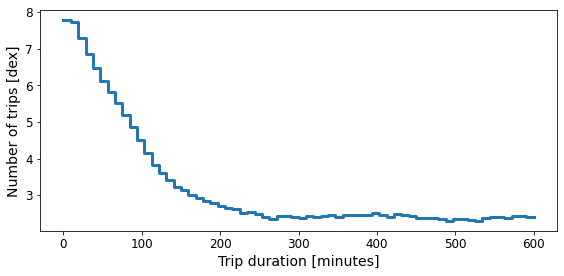

In [15]:
# Plot the distribution of trip durtaions
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_duration_min', limits=[0, 600], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Trip duration [minutes]')
plt.ylabel('Number of trips [dex]')
plt.show()

We see that the majority of taxi trips, 95% to be exact last less than 30 minutes. From the above plot, we see the distribution falls of, and almost becomes flat after 200 minutes. Can you imagine, spending over 3 hours in a taxi in New York City! Perhaps it happens.. 

So let's be..open minded for now, and consider all trips that last less than 3 hours in total.

In [0]:
# Filter taxi trips that have unreasonably long dirations
df_filtered = df_filtered[(df_filtered.trip_duration_min > 0) & (df_filtered.trip_duration_min < 180)]

Now let's look at the mean speed of a trip. Let us first look a the extremes:

In [17]:
# Minimum and maximum average speed of a taxi trip
print('Minimal mean speed: %.3f miles/hour.' % (df_filtered.trip_speed_mph.min()))
print('maximal mean speed: %.3f miles/hour.' % (df_filtered.trip_speed_mph.max()))

Minimal mean speed: 0.003 miles/hour.
maximal mean speed: 175320.003 miles/hour.


From the extremes of this column we notice that we have some serious outliers. On the lower end of the spectrum, the slowest speeds are considerably slower than walking sleeds. On the high end of the spectrum, those cars are flying so fast, they can be used as spaceships! 

Let us plot the distribution of mean speeds, for a more sensible, or at least physically viable range.

[########################################] 100.00% elapsed time  :     2.69s =  0.0m =  0.0h
 

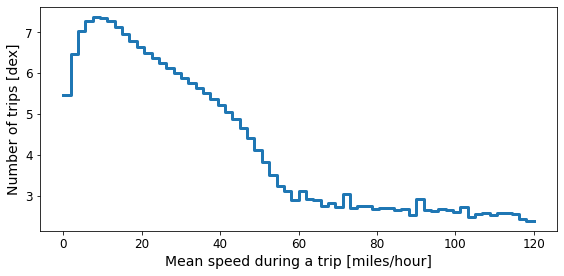

In [18]:
# Plot the distribution of trip durtaions
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_speed_mph', limits=[0, 120], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Mean speed during a trip [miles/hour]')
plt.ylabel('Number of trips [dex]')
plt.show()

Based on this plot we can make a sensible choce of a typical trip speed: somewhere in the range of 1-60 miles per hour.

In [0]:
# Filter out errouneous average trip speeds.
df_filtered = df_filtered[(df_filtered.trip_speed_mph > 1) & (df_filtered.trip_speed_mph < 60)]

Finally, let's look at the cost of the taxi trips. From the output of the `describe()` function, we can see that there are some crazy outliers in the *fare_amount*, *total_amount*, and *tip_amount*. For starters, no value in these columns should be negative. Also their upper limits are ridiculously high. Let's look at their distributions, but in a more sensible range.

[########################################] 100.00% elapsed time  :    10.74s =  0.2m =  0.0h
[########################################] 100.00% elapsed time  :    10.73s =  0.2m =  0.0h
[#######################################-] 100.00% elapsed time  :    10.75s =  0.2m =  0.0h
 

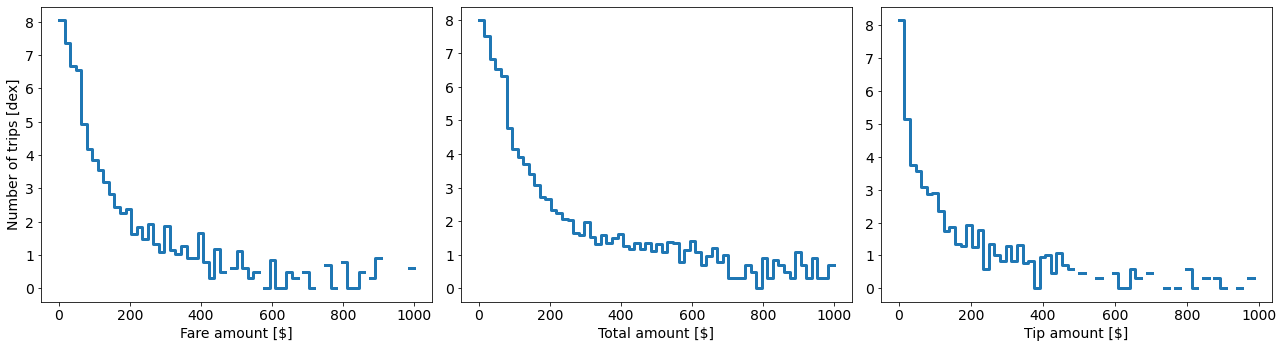

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
df_filtered.plot1d('fare_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Fare amount [$]')
plt.ylabel('Number of trips [dex]')
plt.tick_params(labelsize=14)

plt.subplot(132)
df_filtered.plot1d('total_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Total amount [$]')
plt.ylabel('')
plt.tick_params(labelsize=14)

plt.subplot(133)
df_filtered.plot1d('tip_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Tip amount [$]')
plt.ylabel('')
plt.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

We see that in all three cases, these distribution have some very long tail. Perhaps few of these large fares are legit, most are probably or hopefully errouneous data, or maybe some funny business is going on from time to time. In any case, we would like to focus on the regular "vanilla" rides, so we will select all trips that have total and fare amount less than \\$200 (the elbow of the distributions). Same for the tips. Note that the tips are not included in the total amount column.  We also require that the fare and total amount be larger than \\$0. This condition is not imposed on the tips, although none of these can be negative.

In [0]:
df_filtered = df_filtered[((df_filtered.total_amount > 0) & (df_filtered.total_amount < 200) & 
                           (df_filtered.fare_amount > 0) & (df_filtered.fare_amount < 200) &
                           (df_filtered.tip_amount >= 0) & (df_filtered.tip_amount < 200))]

Finally, after this initial cleaning of the data is done, let's see how many taxi trips we have left

In [22]:
N_samples = len(df_filtered)
print(f'Number of trips in the filtered dataset: {N_samples}')

Number of trips in the filtered dataset: 141987849


We have over 1.1 billion taxi trips for our upcoming analysis. Let's get to it!

### General Exploratory Data Analysis

Let's assume we are a prospective taxi driver, or even a manager of a taxi company, and are interested in finding out where are, on average, the best hotspots to pick up passengers from, which will lead to large taxi fees.

Naively, we can just plot a map of the pickup locations color-coded by the average fare amount for that big, i.e. part of the town. 

However, as a taxi driver, we have our own expences as well. We need to pay for fuel, or taking a passenger somewhere remote might mean that we will spend a lot of time and fuel just getting back to the city centre, and perhaps it will not be so easy to find a passenger for our trip back. Having that into consideration, we decide to instead color code the map of NYC by the mean of the trip fare divided by the trip distance. This is simple way we can introduce normalization, i.e. taking some of our costs into account.

These two cases are plotted below

In [0]:
# Define new columns that might prove useful:
df_filtered['tip_percentage'] = df_filtered.tip_amount / df_filtered.total_amount * 100.
df_filtered['fare_over_distance'] = df_filtered.fare_amount / df_filtered.trip_distance

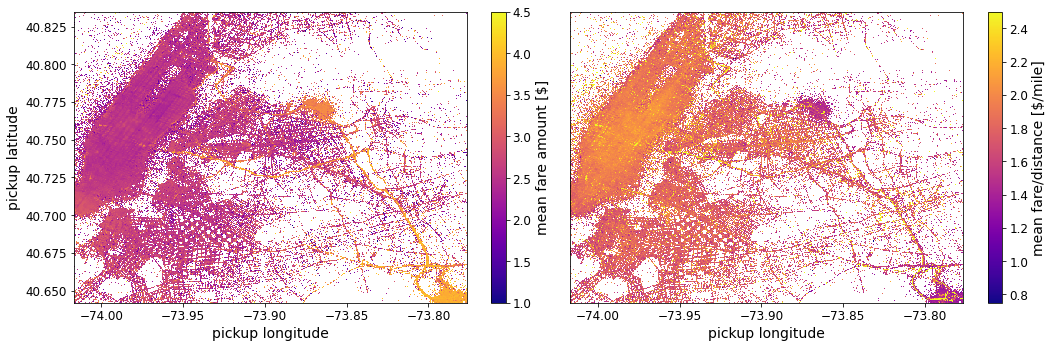

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
df_filtered.plot('pickup_longitude', 'pickup_latitude', what='mean(fare_amount)',
                 colormap='plasma', f='log1p', shape=512, colorbar=True, 
                 colorbar_label='mean fare amount [$]', vmin=1, vmax=4.5)

plt.xlabel('pickup longitude')
plt.ylabel('pickup latitude')

plt.subplot(122)
df_filtered.plot('pickup_longitude', 'pickup_latitude', what='mean(fare_over_distance)',
                 colormap='plasma', f='log1p', shape=512, colorbar=True, 
                 colorbar_label='mean fare/distance [$/mile]', vmin=0.75, vmax=2.5)

plt.xlabel('pickup longitude')
plt.ylabel('')
plt.gca().axes.get_yaxis().set_visible(False)


plt.tight_layout()
plt.show()

We see that in the 1st case, if we just care about getting the maximum fare for the service provided, it is best to pick up passengers around the NYC airprots, and long the main streets, such as the Van Wyck Expressway, and Long Island Expressway avenues.

However, when we divide by the distance travelled, we get a slightly different picture. The Van Wyck Expressway, and Long Island Expressway avenues are still relevant, but much less prominant, the airports are not as popular. Some other hotspots appear on the other side of the Hudson river, which seem quite profitable locations to pick up passengers from.

##### When do trips happens

Next, we wanna figure out when do most of the taxi usage happens so we can schedule our working hours appropriately.

In [0]:
# Extract some date/time features
df_filtered['pickup_hour'] = df_filtered.pickup_datetime.dt.hour
df_filtered['pickup_day_of_week'] = df_filtered.pickup_datetime.dt.dayofweek
df_filtered['pickup_month'] = df_filtered.pickup_datetime.dt.month - 1  # to count from zero
df_filtered['pickup_is_weekend'] = (df_filtered.pickup_day_of_week>=5)

# Treat these columns as label/ordinal encoded values
df_filtered.categorize(column='pickup_hour')
df_filtered.categorize(column='pickup_day_of_week')
df_filtered.categorize(column='pickup_month')

# Helper lists for labelling the plots 
label_month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
label_day_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

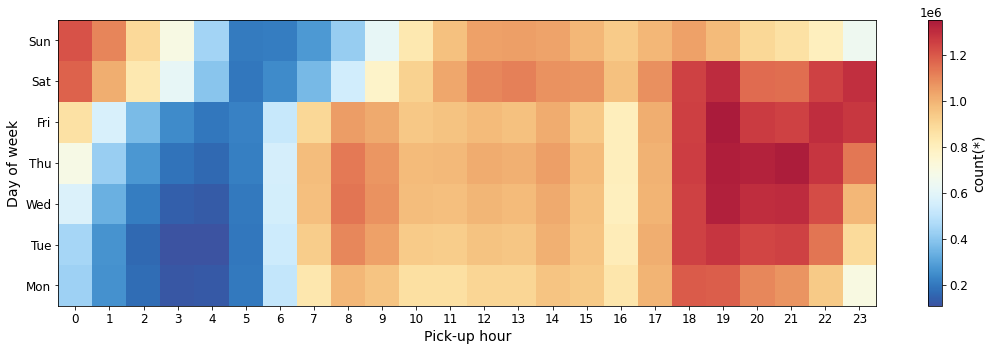

In [26]:
# Plot number of taxi trips per hours vs day of week
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

This makes sense: most of the trips happen in the eveings, specifically Friday night and Saturday night are very popular. Conversly there is little taxi traffic in the early hours of the day. Notice that there is a small peak in the distribution at around 8-9 in the morning on the work days. The same time slot during the weekends seem to see little taxi traffic. Is this the time when people hurry to go to work or work-related events (on the weekends this would not be true)?

Now let's look when the taxi trips take longer (or shorter time).

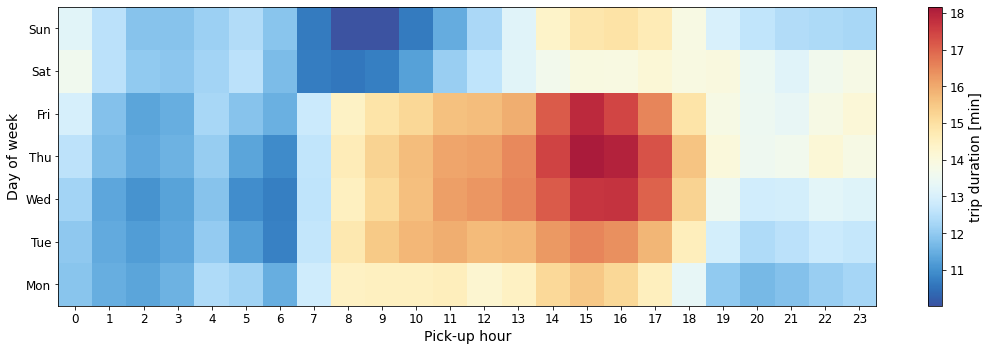

In [27]:
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', what='mean(trip_duration_min)', 
                 colorbar_label='trip duration [min]', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

On average the trips take longest time around 14-17 o'clock. The shortest trips happen in the weekends in the mornings 8-10 o'clock, as well as the at ~6 o'clock during the working days.

Let's see how the mean speed varies as a function of time and day of week.

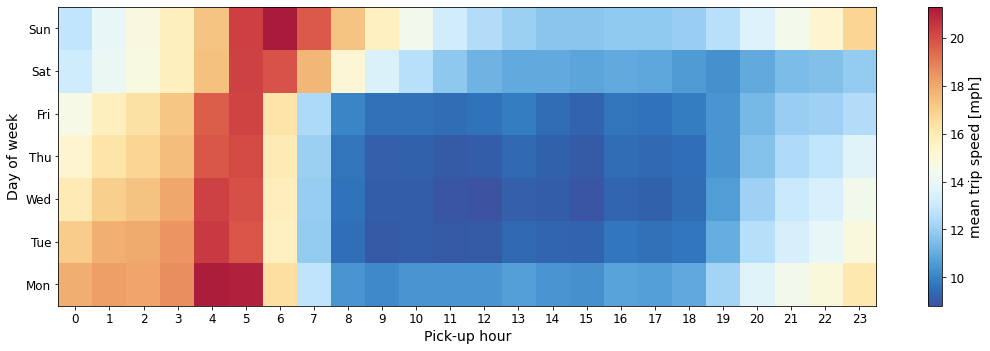

In [28]:
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', what='mean(trip_speed_mph)', 
                 colorbar_label='mean trip speed [mph]', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

This make sense, this is like inverse of the duration plot above. So the results are consistent, adds confidence in our analysis.

Let's when we earn the most money. Let's find out when on average we would get the largest tip, and when we would make the most profit.

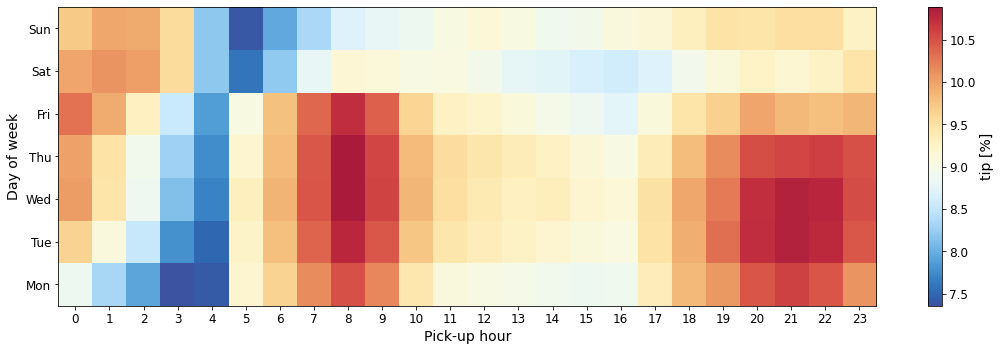

In [29]:
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', what='mean(tip_percentage)',
                 colorbar_label='tip [%]', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

If we care about profit, simply looking at the fare amount is not optimal. Lets look at the fare divided by distance instead (to account for costs).

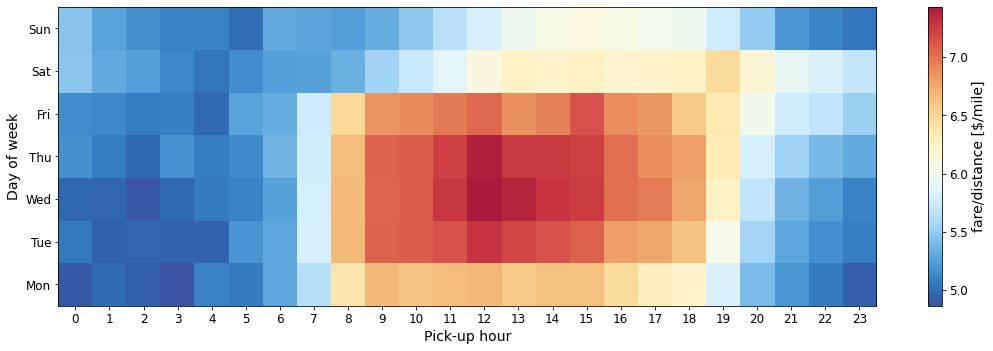

In [30]:
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', what='mean(fare_over_distance)', 
                 colorbar_label='fare/distance [$/mile]', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

This makes sense: the best earnings per mile happen during rush hours, especually around noon. 

Notice the anti-pattern observed between the trip/distance and tip percentage plots. Optimal time for a taxi driver to be working is 8-10 in the morning: best pay, best tip, reasonable demand.

### Expensive computatons

Now let's look at the distance. The dataset provides the trip distance, i.e. the distance the taxi travelled from the pickup to the dropoff location. Given that we have the exact pickup and dropoff coordintes, we can calculate the "true" distance between the origin and the destination, as if we could fly directly between the two.

We call this *arc_distance* as it traces an arc on the surface of the Earth.

In [0]:
# arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# Expression to be executed with numpy - the default option
# df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude, 
#                                            df_filtered.pickup_latitude, 
#                                            df_filtered.dropoff_longitude, 
#                                            df_filtered.dropoff_latitude)

# Expression to be pre-compiled with numba, and then executed
df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude, 
                                           df_filtered.pickup_latitude, 
                                           df_filtered.dropoff_longitude, 
                                           df_filtered.dropoff_latitude).jit_numba()

# Expression to be pre-compiled with CUDA, and then executed on you GPU 
# provided you have a CUDA compatible NVIDIA GPU.
# df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude, 
#                                            df_filtered.pickup_latitude, 
#                                            df_filtered.dropoff_longitude, 
#                                            df_filtered.dropoff_latitude).jit_cuda()

Now this is very computationally expensive feature to compute on the fly, even though all virtual expressions in Vaex and executed in parallel right out of the box. 

In such cases, Vaex provides easy ways to speed things up considerably. One way is to use numba (`jit_numba()`) or pythran (`jit_pythran()`) to pre-compile such expressions to C++ or Fortran respectively, the execution of which is much faster. You can even use CUDA(`jit_cuda()`) to utilise your NVIDIA graphics card if you have one at hand. 

Anyway, let's compare the distributions of actual vs "true" distances.

[#####################################---] 100.00% elapsed time  :     0.91s =  0.0m =  0.0h
[########################################] 100.00% elapsed time  :    14.40s =  0.2m =  0.0h
[########################################] 100.00% elapsed time  :    12.61s =  0.2m =  0.0h
 

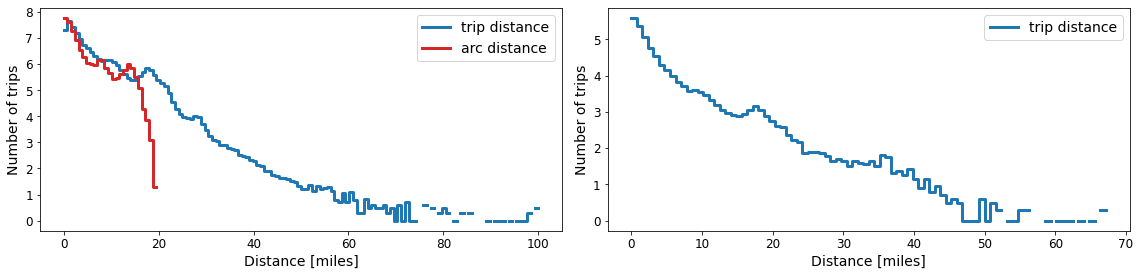

In [32]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
df_filtered.plot1d('trip_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C0', 
                   label='trip distance', progress=True)
df_filtered.plot1d('arc_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C3', 
                   label='arc distance', progress=True)
plt.legend(fontsize=14)
plt.xlabel('Distance [miles]')
plt.ylabel('Number of trips')


plt.subplot(122)
df_filtered.plot1d('trip_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C0', 
                   selection='arc_distance<0.06', label='trip distance', progress=True)
plt.legend(fontsize=14)
plt.xlabel('Distance [miles]')
plt.ylabel('Number of trips')


plt.show()

It is interesting that the arc distance never exceeds 21 miles, but the distance the taxi travelled can be 5 times larger. In fact, there are millions of taxi trips for which the dropoff location is within 100 meters, or 0.06 miles, from the pickup location.

In [33]:
N_trips_small_arc_distance = len(df_filtered[df_filtered.arc_distance<0.06])
print(f'Number of trips with arc distance of less than 100 meters: {N_trips_small_arc_distance}')

Number of trips with arc distance of less than 100 meters: 909130


### YellowCabs through the years

Let us see how some key statistics have evolved throughout the years.

In [0]:
df_filtered['pickup_year'] = df_filtered.pickup_datetime.dt.year
df_groupby_year = df_filtered.groupby(by=df_filtered.pickup_year, 
                                      agg={'count': vaex.agg.count(),
                                           'trip_distance': vaex.agg.mean('trip_distance'),
                                           'arc_distance': vaex.agg.mean('arc_distance'),
                                           'tip_amount': vaex.agg.mean('tip_amount'),
                                           'tip_percentage': vaex.agg.mean('tip_percentage'),
                                           'fare_amount': vaex.agg.mean('fare_amount'),
                                           'total_amount': vaex.agg.mean('total_amount'),
                                           'passenger_count': vaex.agg.sum('passenger_count')})

Let's see the total number of taxi trips per year

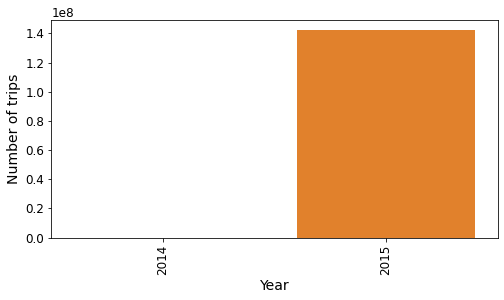

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_groupby_year.pickup_year.values, y=df_groupby_year['count'].values)
plt.xlabel('Year')
plt.ylabel('Number of trips')
plt.xticks(rotation='vertical')
plt.show()

Let's see how the trip fares and tips have evolved over the years

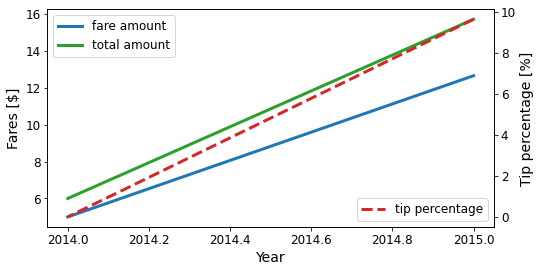

In [36]:
plt.figure(figsize=(8,4))
plt.plot(df_groupby_year.pickup_year.values, 
         df_groupby_year.fare_amount.values, 
         lw=3, color='C0', label='fare amount')
plt.plot(df_groupby_year.pickup_year.values, 
         df_groupby_year.total_amount.values, 
         lw=3, color='C2', label='total amount')
plt.xlabel('Year')
plt.ylabel('Fares [$]')
plt.legend()

plt.twinx()
plt.plot(df_groupby_year.pickup_year.values, 
         df_groupby_year.tip_percentage.values, 
         lw=3, ls='--', color='C3', label='tip percentage')

plt.legend(loc=4)
plt.ylabel('Tip percentage [%]')
plt.xticks(rotation='vertical')
plt.show()

Total number of passengers transported.

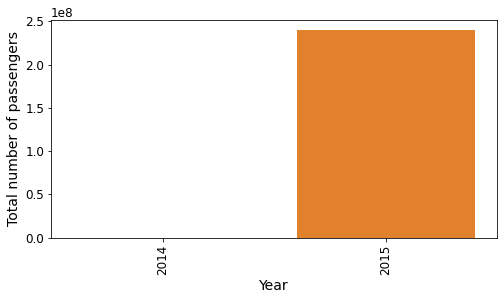

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_groupby_year.pickup_year.values, y=df_groupby_year.passenger_count.values)
plt.xlabel('Year')
plt.ylabel('Total number of passengers')
plt.xticks(rotation='vertical')
plt.show()

Mean trip and arc distance between the pickup and dropoff locations

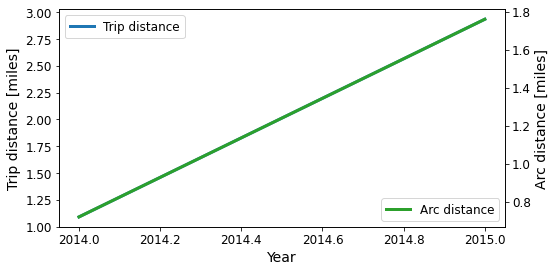

In [38]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_groupby_year.pickup_year.values, 
             y=df_groupby_year.trip_distance.values, 
             lw=3, color='C0', label='Trip distance')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Trip distance [miles]')

plt.twinx()
sns.lineplot(x=df_groupby_year.pickup_year.values, 
             y=df_groupby_year.arc_distance.values, 
             lw=3, color='C2', label='Arc distance')

plt.legend(loc=4)

plt.ylabel('Arc distance [miles]')
plt.xticks(rotation='vertical')
plt.show()

Interesting that even though the trend is very small, we observe an increase in both the arc and the trip distance as time goes on. This is especially interesting in light of increasing fares, and decreasing total number of trips as well as the total number of passengers taken.

### Payment methods

Finally, let's examine the way people way. First of all, let's check all of the options. 

In [39]:
# Inspect the payment_type
df_filtered.payment_type.str.lower().value_counts(progress=True)

[########################################] 100.00% elapsed time  :    17.64s =  0.3m =  0.0h
 

1      89357065
2      52186175
3        326293
4        118303
5            12
csh           1
dtype: int64

[From the documentation provided](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf):
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

Given that there are only 6 valid options, we can simply map them to integers.

In [0]:
# Define a mapping dictionary
map_payment_type = {'csh': 2, 'crd': 1, 'cash': 2, '1': 1, 'cas': 2, '2': 2, 'credit': 1, 'cre': 1, 'unk': 5, 
                    'noc': 3, 'no charge': 3, '3':3, 'dis': 4, 'no ': 3, '4': 4, 'dispute': 4, 'na ': 5, '5':5}

df_filtered['payment_type_'] = df_filtered.payment_type.str.lower().map(map_payment_type, 
                                                                        default_value=-1, 
                                                                        allow_missing=True)

Now let's see how the payment habbits of passengeres evolved through the years

In [0]:
# Count the number of trips per year per payment type
df_groupby_year_payment_type = df_filtered.groupby(by=['pickup_year', 'payment_type_'], 
                                                   agg={'count': vaex.agg.count()})

# Map meaningful labels to the payment type codes
expr = df_groupby_year_payment_type.payment_type_.map(mapper={1: 'card', 
                                                              2: 'cash', 
                                                              3: 'No Charge', 
                                                              4: 'Dispute', 
                                                              5: 'Unknown'})
df_groupby_year_payment_type['payment_type_label'] = expr

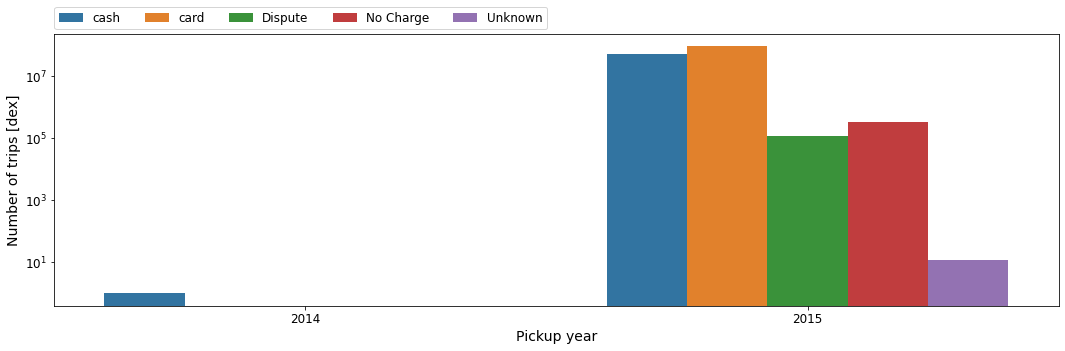

In [42]:
plt.figure(figsize=(18, 5))

sns.barplot(x='pickup_year', y='count', hue='payment_type_label', 
            data=df_groupby_year_payment_type.to_pandas_df(virtual=True))
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.00, 1.1), loc=2, borderaxespad=0., ncol=5)
plt.xlabel('Pickup year')
plt.ylabel('Number of trips [dex]')

plt.show()

Let's see how the habit of the passengers changes per day of week and time of week.

In [0]:
_filter = df_filtered.payment_type_<3
df_count_payment = df_filtered[_filter].groupby(by=['pickup_day_of_week', 'pickup_hour'], 
                                                agg={'card': vaex.agg.count(selection='payment_type_==1'),
                                                     'cash': vaex.agg.count(selection='payment_type_==2')
                                                    })

# Add the ratio between trips paid for by cash over those paid by card
df_count_payment['payment_ratio'] = df_count_payment.cash/df_count_payment.card

In [0]:
# Sort by pickup day of week and hour
df_count_payment_sorted = df_count_payment.sort(by=['pickup_day_of_week', 'pickup_hour'])

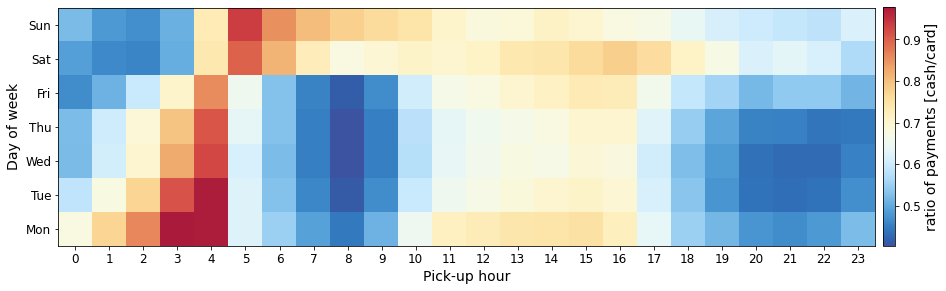

In [45]:
# Plot number of taxi trips per hours vs day of week
plt.figure(figsize=(15, 5))
plt.imshow(df_count_payment_sorted.payment_ratio.values.reshape(7, 24), origin='lower', cmap=cm_plusmin)
plt.colorbar(label='ratio of payments [cash/card]', fraction=0.0143, pad=0.01)

plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()



It is interesting to notice the similar patterns as the tip percentages. Does this mean that passengers that pay by cash, on average don't tip as much as those that that pay by card? Let's look at the distributions.

[#######################################-] 100.00% elapsed time  :    16.56s =  0.3m =  0.0h
[#######################################-] 100.00% elapsed time  :    16.63s =  0.3m =  0.0h
 

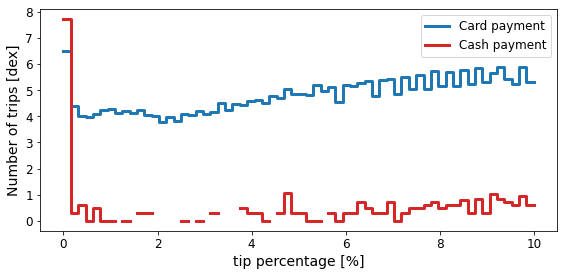

In [46]:
plt.figure(figsize=(8, 4))
f = 'log10'
shape = 64
limits = [0, 10]
df_filtered.plot1d('tip_percentage', limits=limits, shape=shape, 
                   selection='payment_type_ == 1', f=f,
                   progress=True, label='Card payment', color='C0', lw=3)
df_filtered.plot1d('tip_percentage', limits=limits, shape=shape, 
                   selection='payment_type_ == 2', f=f,
                   progress=True, label='Cash payment', color='C3', lw=3)

plt.legend()
plt.xlabel('tip percentage [%]')
plt.ylabel('Number of trips [dex]')

plt.show()

How often to passengers tip?

In [47]:
# for card payments
no_tips_card = (df_filtered.count(selection='(payment_type_ == 1) & (tip_amount == 0)') /  
                df_filtered.count(selection='payment_type_ == 1')) * 100.

print(f'{no_tips_card:.2f}% of the passengers that pay by card do not leave tips.')

3.55% of the passengers that pay by card do not leave tips.


In [48]:
# for cash payments
no_tips_cash = (df_filtered.count(selection='(payment_type_ == 2) & (tip_amount == 0)') /  
                df_filtered.count(selection='payment_type_ == 2')) * 100.

print(f'{no_tips_cash:.2f}% of the passengers that pay by card do not leave tips.')

100.00% of the passengers that pay by card do not leave tips.


So it looks like passengers that pay by cash either hardly ever leave a tip, which would be strange, or the tip is small and it is not recorded in the data.

But let's see the distributions of _fare_amount_ and _total_amount_, depending on whether the payment method was card or cash.

[#######################################-] 100.00% elapsed time  :    15.70s =  0.3m =  0.0h
[########################################] 100.00% elapsed time  :    15.76s =  0.3m =  0.0h
 

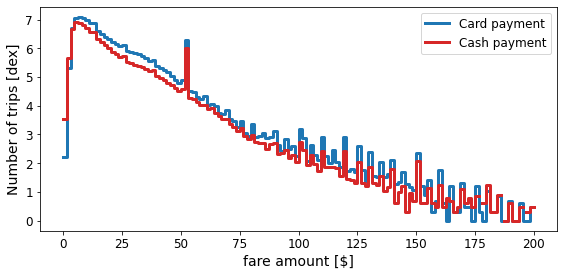

In [49]:
# Plot the distribution of fare amount, per payment method
plt.figure(figsize=(8, 4))
f = 'log10'
shape = 128
limits = [0, 200]
df_filtered.plot1d('fare_amount', limits=limits, shape=shape, 
                   selection='payment_type_ == 1', f=f,
                   progress=True, label='Card payment', color='C0', lw=3)
df_filtered.plot1d('fare_amount', limits=limits, shape=shape, 
                   selection='payment_type_ == 2', f=f,
                   progress=True, label='Cash payment', color='C3', lw=3)

plt.legend()
plt.xlabel('fare amount [$]')
plt.ylabel('Number of trips [dex]')

plt.show()

[########################################] 100.00% elapsed time  :    15.62s =  0.3m =  0.0h
[#######################################-] 100.00% elapsed time  :    15.74s =  0.3m =  0.0h
 

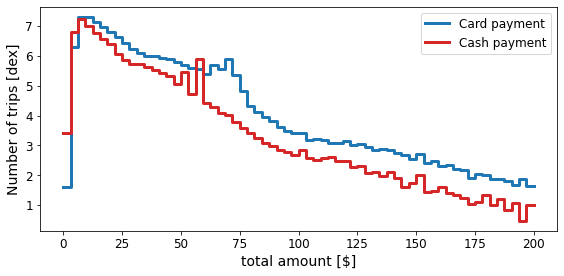

In [50]:
# Plot the distribution of total amount, per payment method
plt.figure(figsize=(8, 4))
f = 'log10'
shape = 64
limits = [0, 200]
df_filtered.plot1d('total_amount', limits=limits, shape=shape, 
                   selection='payment_type_ == 1', f=f,
                   progress=True, label='Card payment', color='C0', lw=3)
df_filtered.plot1d('total_amount', limits=limits, shape=shape, 
                   selection='payment_type_ == 2', f=f,
                   progress=True, label='Cash payment', color='C3', lw=3)

plt.legend()
plt.xlabel('total amount [$]')
plt.ylabel('Number of trips [dex]')

plt.show()

With such a big dataset, comprising over billion taxi trips done over 7 years, one can choose many possible way in which to slide and dice this dataset. I am sure it contains many valuable insights, suprises and secrets inside it. And with the power of Vaex, you can take your time and explore in the comfort of your own laptop.

# ノートブックの保存
すべてのセルを実行するようにして、放置してColabのセッションが切れるとしても、最終的に実行後のノートブックが確実に保存されるようにする。


In [51]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>